In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from numpy import mean, std

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

# K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [71]:
# Data preparation
df = pd.read_csv("Dataset_for_simulation_linear_regression.csv")
df = df.drop(['Country Stamp','Suspicious level month stamp','Suspicious level year stamp','Suspicious level country stamp'], axis=1)
df = pd.get_dummies(df)
x_to_scale = df.drop(['Alert', 'Brand', 'EU entry point'], axis=1)
y = df['Alert']
# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_to_scale)
sd_df = pd.DataFrame(scaled_data, columns = x_to_scale.columns)
X = sd_df.join(df['Brand']).join(df['EU entry point'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
# Feature selection
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
print(X_train_fs, X_test_fs, fs)

[[-0.27946789 -0.21847448  1.29619296 ... -0.6942325   1.
  27.        ]
 [ 1.56926761  1.3496329  -0.25411583 ... -0.6942325   7.
  15.        ]
 [-0.37676976 -0.04424032  0.13346137 ...  1.44043962  5.
   1.        ]
 ...
 [-0.57137349 -0.56694278 -1.02927023 ... -0.6942325   5.
   6.        ]
 [-0.96058097 -0.91541109 -0.64169303 ...  1.44043962  6.
   4.        ]
 [ 2.05577696  1.52386705 -1.02927023 ... -0.6942325   3.
   1.        ]] [[-0.66867536 -1.26387939 -0.64169303 ... -0.6942325   5.
  25.        ]
 [-0.37676976 -0.56694278 -0.25411583 ... -0.6942325   1.
  15.        ]
 [-1.34978844 -1.43811355  1.29619296 ... -0.6942325   5.
  15.        ]
 ...
 [ 0.30434332 -0.04424032  1.29619296 ... -0.6942325   8.
  12.        ]
 [-0.57137349 -0.56694278  0.90861576 ... -0.6942325   0.
   6.        ]
 [ 0.20704145  0.82693044 -1.02927023 ...  1.44043962  4.
   9.        ]] SelectKBest(k='all', score_func=<function f_regression at 0x0000022413CEEE50>)


In [112]:
score_df = pd.DataFrame(fs.scores_, index= [X.columns], columns=['Score'])
score_df = score_df.sort_values(by='Score', ascending=False)
score_df

,Score
Online selling,2455.959670
EU manufactured,948.452174
Days from manufactured to first scan,400.749205
Days from manufactured to market release,306.317782
Matching market and sale country,297.769869
Days since manufactured,256.531491
Days to expire,152.298105
Number of owners,93.003673
Number of scans before first consumer scan,83.910628
EU entry transport_Air,76.629700


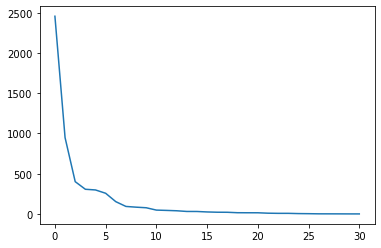

In [116]:
plt.plot(score_df.values)
plt.show()

In [118]:
X = X[['Online selling', 'EU manufactured', 'Days from manufactured to first scan', 
      'Days from manufactured to market release', 'Matching market and sale country',
      'Days since manufactured', 'Days to expire']]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [121]:
# Cross-validation method
cv = LeaveOneOut()

In [122]:
# Models
# Linear regression
linearR = LinearRegression() 

# Polynomial
ridgeR = Ridge(alpha=1.0)

# Gaussian Kernel - Radial Basis Function
lassoR = Lasso(alpha=0.1)



In [123]:
# Training of the models
# Linear regression
score_linearR_r2 = cross_val_score(linearR, X_train, y_train, scoring='r2',
                         cv=5, n_jobs=-1)
score_linearR_mse = cross_val_score(linearR, X_train, y_train, scoring='neg_mean_squared_error',
                         cv=5, n_jobs=-1)

In [131]:
score_linearR_r2_test = cross_val_score(linearR, X_test, y_test, scoring='r2',
                         cv=5, n_jobs=-1)
score_linearR_mse_test = cross_val_score(linearR, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=5, n_jobs=-1)

In [135]:
# Ridge regression
score_ridgeR_r2 = cross_val_score(ridgeR, X_train, y_train, scoring='r2',
                         cv=5, n_jobs=-1)
score_ridgeR_mse = cross_val_score(ridgeR, X_train, y_train, scoring='neg_mean_squared_error',
                         cv=5, n_jobs=-1)

In [136]:
score_ridgeR_r2_test = cross_val_score(ridgeR, X_test, y_test, scoring='r2',
                         cv=5, n_jobs=-1)
score_ridgeR_mse_test = cross_val_score(ridgeR, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=5, n_jobs=-1)

In [137]:
# Lasso regression
score_lassoR_r2 = cross_val_score(lassoR, X_train, y_train, scoring='r2',
                         cv=5, n_jobs=-1)
score_lassoR_mse = cross_val_score(lassoR, X_train, y_train, scoring='neg_mean_squared_error',
                         cv=5, n_jobs=-1)

In [138]:
score_lassoR_r2_test = cross_val_score(lassoR, X_test, y_test, scoring='r2',
                         cv=5, n_jobs=-1)
score_lassoR_mse_test = cross_val_score(lassoR, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=5, n_jobs=-1)

In [139]:
# Performance comparaison
print('Linear regression R2 (and MSE): %.5f (%.3f)' % (mean(score_linearR_r2), mean(score_linearR_mse)*(-1)))
print('Ridge regression R2 (and MSE): %.5f (%.3f)' % (mean(score_ridgeR_r2), mean(score_ridgeR_mse)*(-1)))
print('Lasso regression R2 (and MSE): %.5f (%.3f)' % (mean(score_lassoR_r2), mean(score_lassoR_mse)*(-1)))

Linear regression R2 (and MSE): 0.80336 (220.160)
Ridge regression R2 (and MSE): 0.80349 (219.917)
Lasso regression R2 (and MSE): 0.80189 (221.432)


In [140]:
print('Linear regression R2 (and MSE): %.5f (%.3f)' % (mean(score_linearR_r2_test), mean(score_linearR_mse_test)*(-1)))
print('Ridge regression R2 (and MSE): %.5f (%.3f)' % (mean(score_ridgeR_r2_test), mean(score_ridgeR_mse_test)*(-1)))
print('Lasso regression R2 (and MSE): %.5f (%.3f)' % (mean(score_lassoR_r2_test), mean(score_lassoR_mse_test)*(-1)))

Linear regression R2 (and MSE): 0.74569 (307.546)
Ridge regression R2 (and MSE): 0.75506 (297.118)
Lasso regression R2 (and MSE): 0.75089 (302.529)


In [57]:
hyper_params = [{'n_features_to_select': list(range(1, 33))}]


In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
linearR.fit(x_train, y_train)
rfe = RFE(linearR) 

In [64]:
linearR_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = 10, 
                        verbose = 1,
                        return_train_score=True)
linearR_cv.fit(x_train, y_train)                  


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   10.8s finished


GridSearchCV(cv=10, estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
cv_results = pd.DataFrame(linearR_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.055266,0.011960,0.005097,0.002210,1,{'n_features_to_select': 1},0.692848,0.754926,-0.023821,0.727815,...,0.034677,0.686329,0.694824,0.686147,0.689088,0.700866,0.691963,0.706068,0.626256,0.197304
1,0.045572,0.004860,0.003498,0.000806,2,{'n_features_to_select': 2},0.813769,0.763191,-0.015208,0.760917,...,0.035222,0.740094,0.741775,0.740395,0.742830,0.746358,0.742875,0.760155,0.672546,0.212531
2,0.044473,0.004317,0.003298,0.001186,3,{'n_features_to_select': 3},0.844189,0.763803,-0.039304,0.767811,...,0.033175,0.748899,0.748650,0.748983,0.752605,0.757595,0.750692,0.769277,0.680205,0.215781
3,0.038775,0.002749,0.003097,0.000699,4,{'n_features_to_select': 4},0.847822,0.755811,0.074367,0.772113,...,0.076285,0.753321,0.752090,0.752382,0.756255,0.760883,0.756120,0.773867,0.687884,0.203986
4,0.040175,0.007738,0.002898,0.000943,5,{'n_features_to_select': 5},0.849476,0.694961,0.096747,0.770568,...,0.086412,0.787109,0.784810,0.784155,0.787707,0.796349,0.784149,0.800386,0.716519,0.210157
5,0.037877,0.001699,0.002898,0.000538,6,{'n_features_to_select': 6},0.849152,0.682819,0.094219,0.767853,...,0.084696,0.787341,0.784817,0.784157,0.787896,0.796365,0.784248,0.800604,0.716909,0.210835
6,0.037677,0.004335,0.003297,0.000640,7,{'n_features_to_select': 7},0.822873,0.777895,0.143752,0.786744,...,0.097863,0.801279,0.800308,0.797451,0.801916,0.808727,0.799119,0.808422,0.731420,0.211218
7,0.035478,0.005101,0.003298,0.000781,8,{'n_features_to_select': 8},0.828590,0.817318,0.167980,0.781774,...,0.102580,0.818772,0.819877,0.811403,0.818147,0.819552,0.812182,0.826870,0.745826,0.214458
8,0.037777,0.004725,0.003197,0.000748,9,{'n_features_to_select': 9},0.817607,0.827482,0.144514,0.802771,...,0.103421,0.824994,0.827980,0.819973,0.822125,0.826120,0.819688,0.834056,0.752345,0.216346
9,0.033379,0.002288,0.002798,0.000599,10,{'n_features_to_select': 10},0.821492,0.832108,0.158071,0.791272,...,0.110066,0.829712,0.831834,0.824106,0.826176,0.829084,0.823278,0.837750,0.756396,0.215481


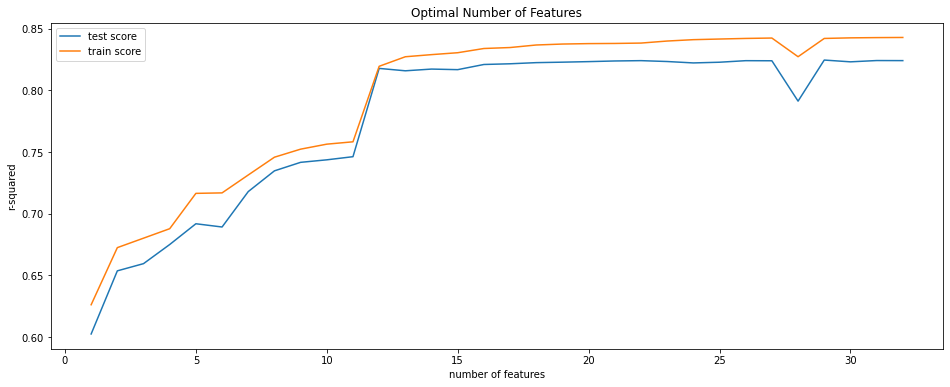

In [67]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [69]:
# final model
n_features_optimal = 12



rfe = RFE(linearR, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = linearR.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.8355345984863018


In [34]:
# Predictions of new medicine. Supposing:
# 'Number of scans': 52,
#'Number of scans before first consumer scan': 5,
#'Number of owners' : 3,
#'Days since last scan': 32,
#'Days since manufactured': 124,
#'Days from manufactured to first scan': 58,
#'Days from manufactured to market release': 42,
#'Number of countries': 7,
#'Distance from selling point': 1780,
#'Online selling': 1,
#'EU entry point': 12,
#'Days to expire': 17,
#'EU entry transport': 1,
#'Pack size': 0,
#'Pack type': 1,
#'Brand': 7,
#'Inspected?': 0,
#'Days since last inspection': 0,
#'Alert':
# New medicine data = [52, 5, 3, 32, 124, 58, 42, 7, 1780, 1, 12, 17, 1, 0, 1, 7, 0, 0]
model.fit(X,y)
row = [[52, 5, 3, 32, 124, 58, 42, 7, 1780, 1, 12, 17, 1, 0, 1, 7, 0, 0]]
y_pred = model.predict(row)
print('Predicted y:', y_pred, sep='\n')

Predicted y:
[1.46202316]
